In [1]:
import numpy as np
from copy import copy
from IPython.display import Audio
from scipy.io import wavfile
from scipy.fftpack import fft, ifft, rfft, irfft
from scipy.signal import butter, freqs, filtfilt
import matplotlib.pyplot as plt

In [2]:
# A few helper functions for making the plots below 

def plot_waveform(T, wav, color, label=None):
    fig, ax = plt.subplots()
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Pressure")
    ax.plot(T, wav, color=color, alpha=.3, label=label)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-1, 2), useMathText=True)
    if label is not None:
        plt.legend()
    return ax
    
def plot_waveform_on_top(ax, T, wav, color, label=None):
    ax.plot(T, wav, color=color, alpha=.3, label=label)
    if label is not None:
        plt.legend()
    return ax

def plot_F_comp(wav_ft, max_f=2000):
    fig, ax = plt.subplots()
    f = np.linspace(0.0, s_rate/2.0, N//2)
    ax.plot(f, wav_ft[0:N//2].real, alpha=.5, label='cos')
    ax.plot(f, wav_ft[0:N//2].imag, alpha=.5, label='sin')
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Pressure")
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-1, 2), useMathText=True)
    plt.legend()
    ax.set_xlim([0, max_f])

This is the name of the audio file you'd like to insert. It must be in your colab folder on google drive. Note that it must be in `.wav` format. If you have an `.mp3` you'd like to use you can find a converter online.

In [3]:
AUDIO_FILE = "hello.wav"

In [4]:
Audio(AUDIO_FILE)

In [22]:
# Loading the audio file and the sampling rate, defining the time stamps T
s_rate, wav = wavfile.read(AUDIO_FILE)
N = len(wav) # Number of samples
T = np.linspace(0, N / s_rate, N) # Time stamps of the samples

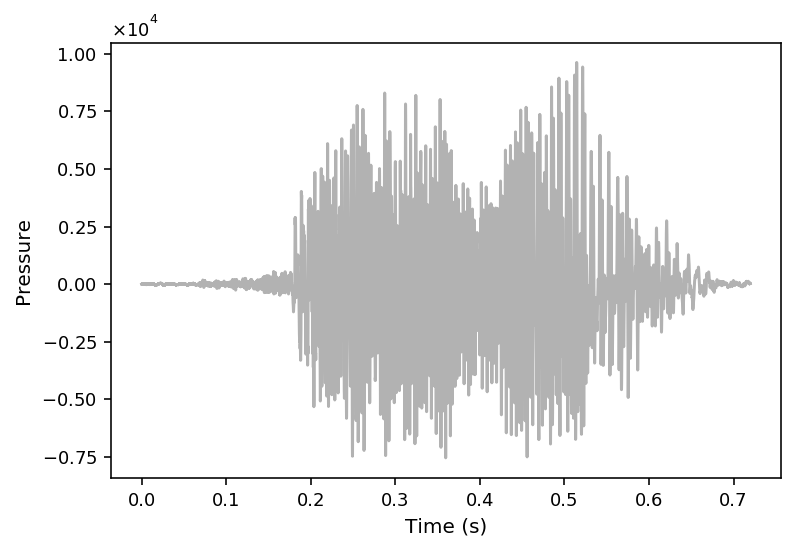

In [23]:
plot_waveform(T, wav, 'k')

(0.2, 0.22)

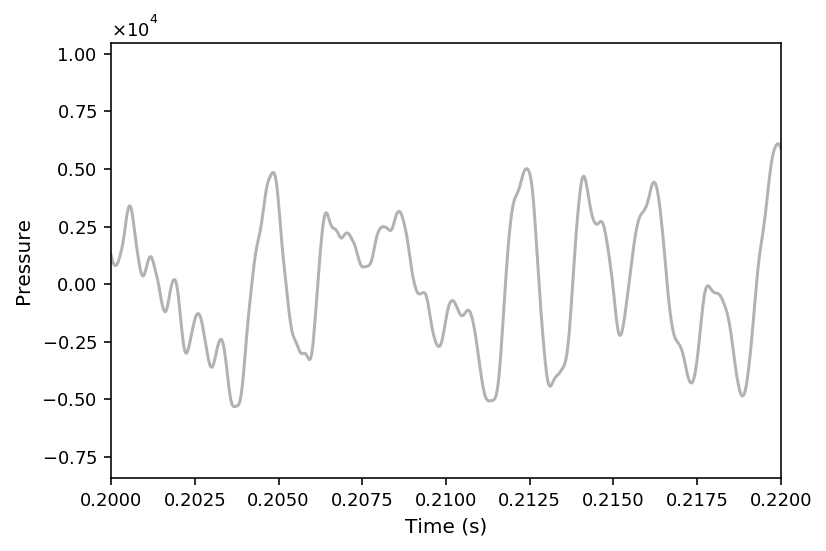

In [24]:
axes = plot_waveform(T, wav, 'k')
axes.set_xlim([.200, .220])

In [25]:
wav_ft = fft(wav)

In [26]:
# a_0
wav_ft.real[0]

11978.0

In [27]:
# The first 20 cos componants, a_k
wav_ft.real[1:21]

array([ 8749.3852825 ,  6754.5686172 , 10991.63027488,  9075.96993772,
        7291.54836766, 10956.74751621,  7553.40337305,  8174.3895804 ,
        9925.27965656,  9314.47230338,  6433.53040536, 13845.73077637,
        4887.04322272, 11529.2905777 ,  2554.56029395,  8185.84656726,
       -2292.82875616, 28404.01368758, 22262.90644995, 14986.21183705])

In [28]:
# The first 20 sin componants, b_0
wav_ft.imag[1:21]

array([  1587.88547686,   -641.22645383,   1100.35647151,   -166.25166763,
        -1793.01747072,   2505.95528634,   1679.38070803,  -2463.23579186,
         -749.58435702,   -247.57318205,   2975.86137149,   -283.67455141,
        -1451.19613555,   -344.66998385,   4961.98408428,  -1385.38376512,
       -13449.55243083, -13842.82903586,   4355.7722344 ,     88.77961444])

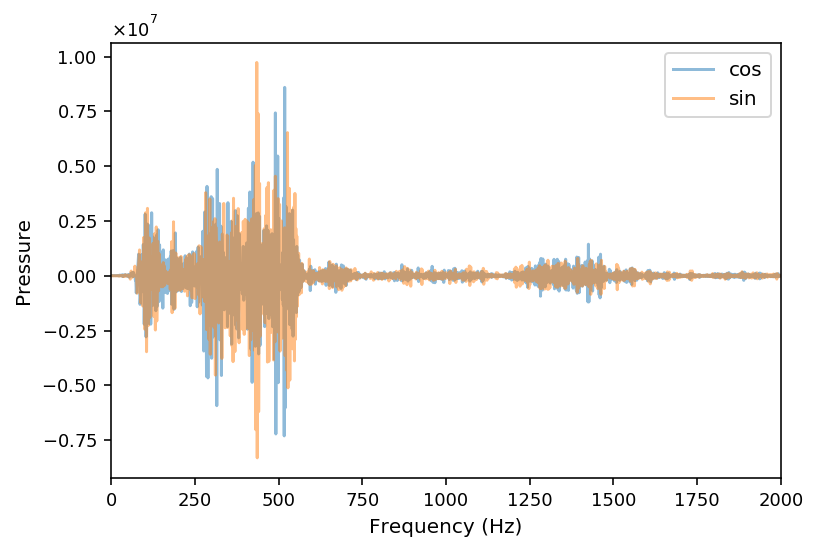

In [29]:
plot_F_comp(wav_ft)

In [30]:
# Removing everything but the first 400 componants of sin and cos
N_app = 400
wav_ft_approx = copy(wav_ft)
wav_ft_approx[N_app+1:-N_app] = 0

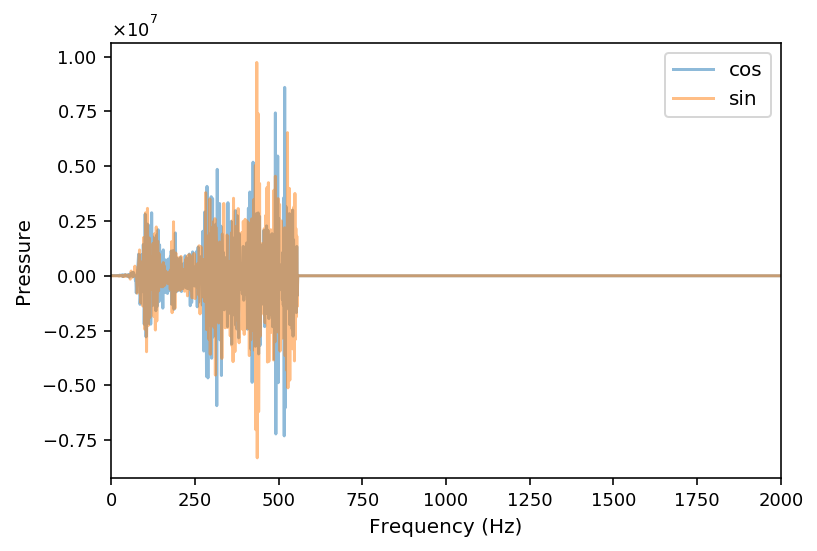

In [31]:
plot_F_comp(wav_ft_approx)

In [32]:
# Converting the coefficients back to a wave
wav_approx = ifft(wav_ft_approx)
wav_approx = wav_approx.real

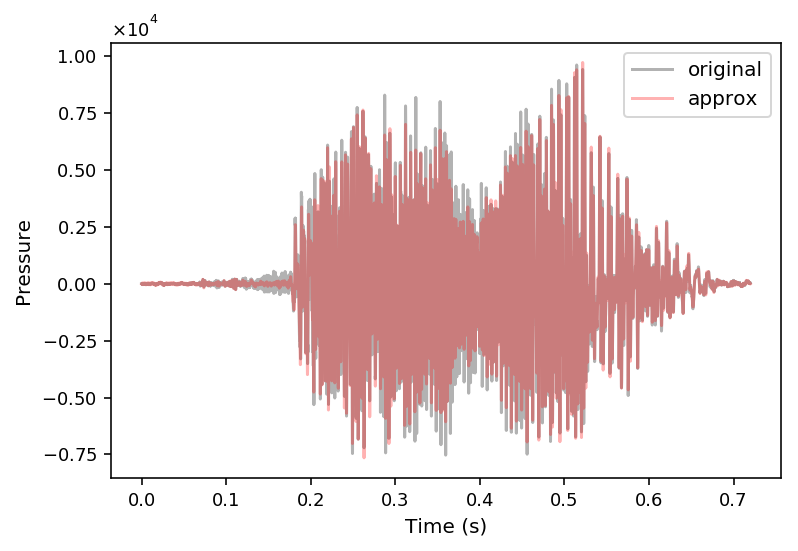

In [33]:
axes = plot_waveform(T, wav, 'k', label='original')
plot_waveform_on_top(axes, T, wav_approx, 'r', label='approx')

(0.2, 0.22)

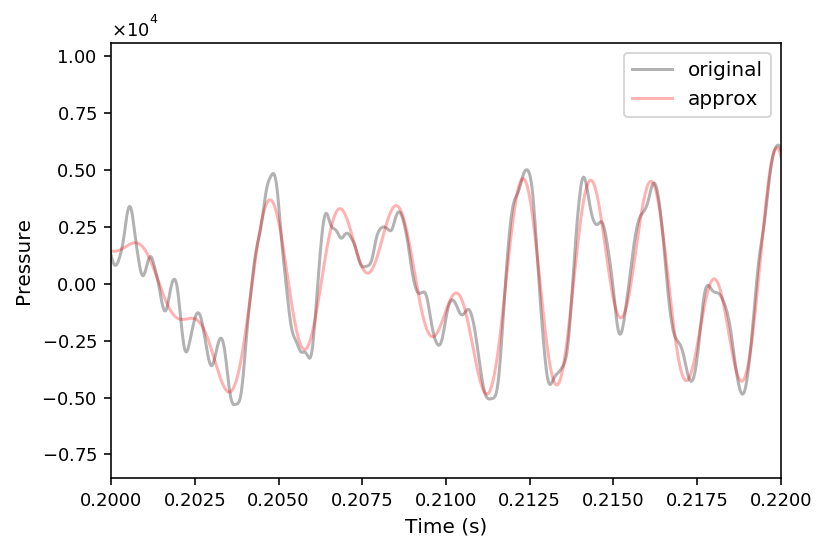

In [34]:
axes = plot_waveform(T, wav, 'k', label='original')
plot_waveform_on_top(axes, T, wav_approx, 'r', label='approx')
axes.set_xlim([.200, .220])

In [35]:
# Saving the audio from truncated series as a .wav
wavfile.write(AUDIO_FILE+"_cut.wav", s_rate, wav_approx*.001)

In [36]:
# New audio from truncated series
Audio(AUDIO_FILE+"_cut.wav")

In [37]:
# Original audio
Audio(AUDIO_FILE)

# Compression

In [38]:
# printing the total number of components for the original wav
a = wav_ft.real
b = wav_ft.imag
print(len(np.nonzero(x)[0]) + len(np.nonzero(y)[0]))

NameError: name 'x' is not defined

In [48]:
# Thresholding coefficients at the value below. Set THRESH to be your threshold
THRESH = 0.25e7 # the cutoff threshold

wav_ft_approx = copy(wav_ft)
a = wav_ft_approx.real
b = wav_ft_approx.imag
a[1:][np.abs(a[1:]) < THRESH] = 0
b[1:][np.abs(b[1:]) < THRESH] = 0
wav_ft_approx = a + 1j * b

In [49]:
# New number of omponants
print(len(np.nonzero(a)[0]) + len(np.nonzero(b)[0]))

229


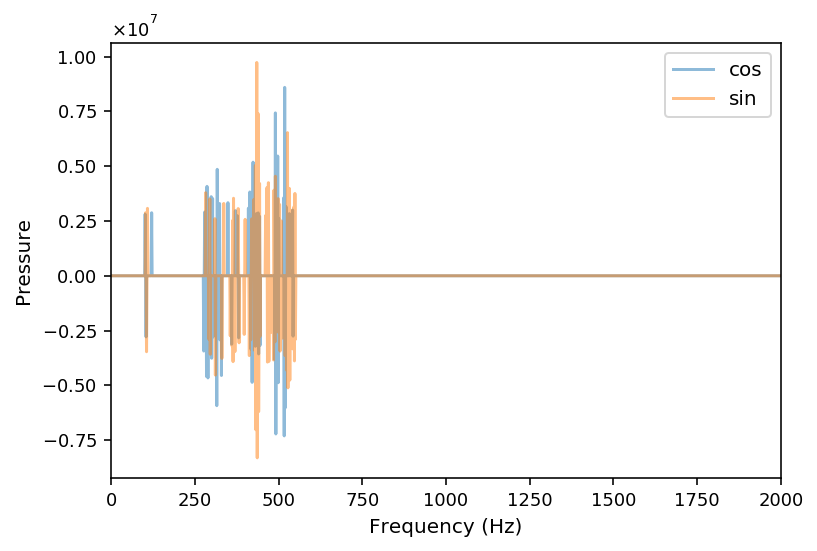

In [50]:
plot_F_comp(wav_ft_approx)

In [51]:
wav_approx = ifft(wav_ft_approx)
wav_approx = wav_approx.real

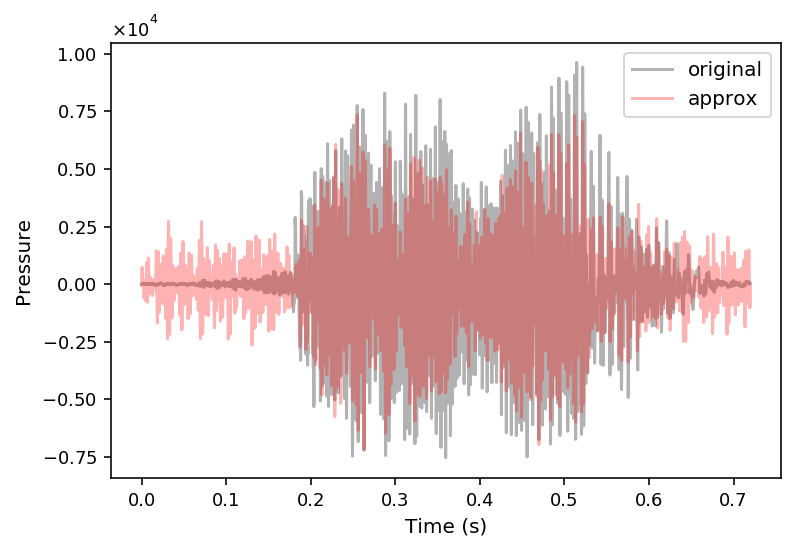

In [52]:
axes = plot_waveform(T, wav, 'k', label='original')
plot_waveform_on_top(axes, T, wav_approx, 'r', label='approx')

(0.2, 0.22)

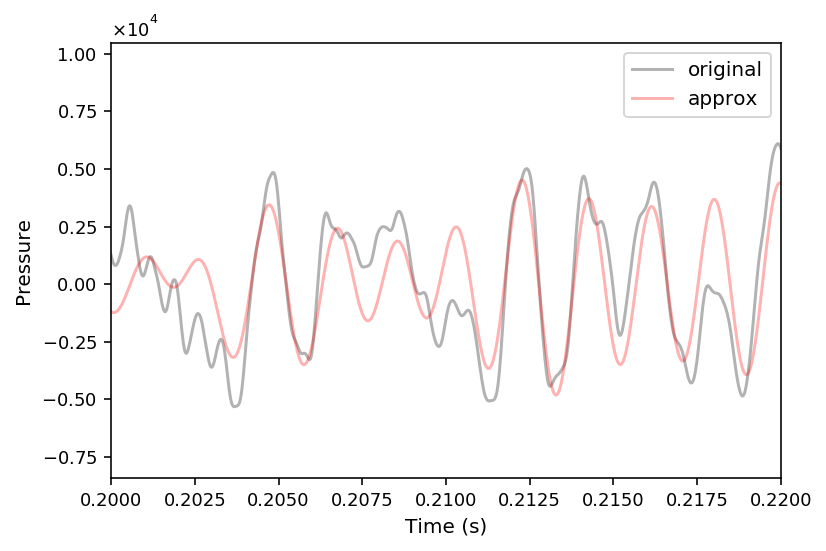

In [53]:
axes = plot_waveform(T, wav, 'k', label='original')
plot_waveform_on_top(axes, T, wav_approx, 'r', label='approx')
axes.set_xlim([.200, .220])

In [54]:
# Converting the coefficients back to a wave
wavfile.write(AUDIO_FILE + "_comp.wav", s_rate, wav_approx*.001)

In [55]:
# New audio from the compressed series
Audio(AUDIO_FILE + "_comp.wav")

In [56]:
# Original audio
Audio(AUDIO_FILE)

# A low pass filter (only keeps the low frequncies)

In [57]:
# Cutoff frequency for the lowpass filter.
F = 400

b, a = butter(4, 2.0*F/s_rate, btype='low')
wav_lp = filtfilt(b, a, wav, padlen=150)
wav_lp_ft = fft(wav_lp)

/Users/badr/anaconda/envs/Python3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


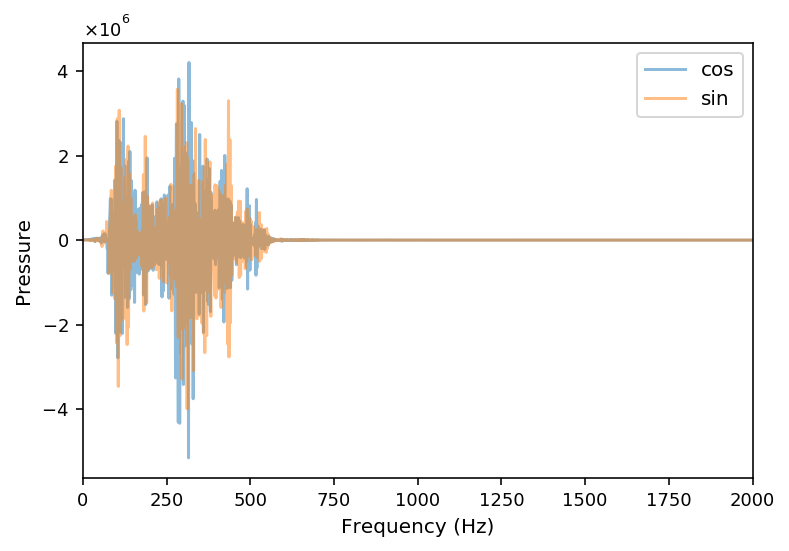

In [58]:
plot_F_comp(wav_lp_ft)

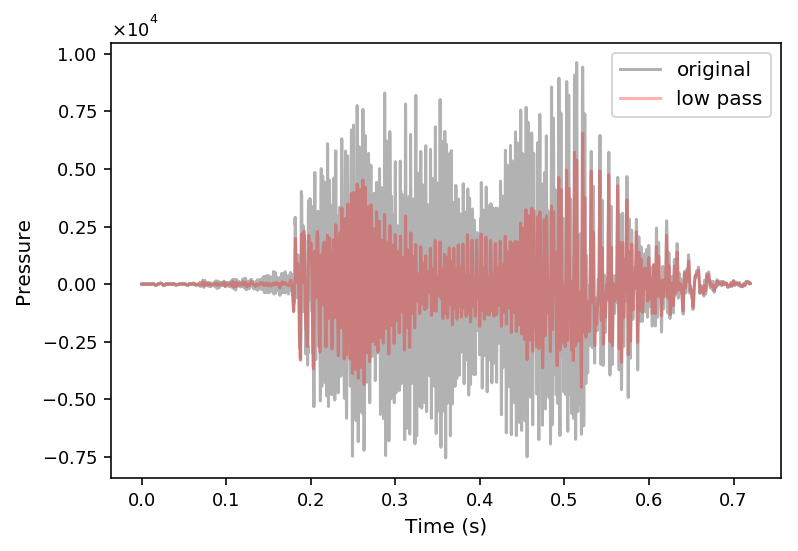

In [59]:
axes = plot_waveform(T, wav, 'k', label='original')
plot_waveform_on_top(axes, T, wav_lp, 'r', label='low pass')

(0.2, 0.22)

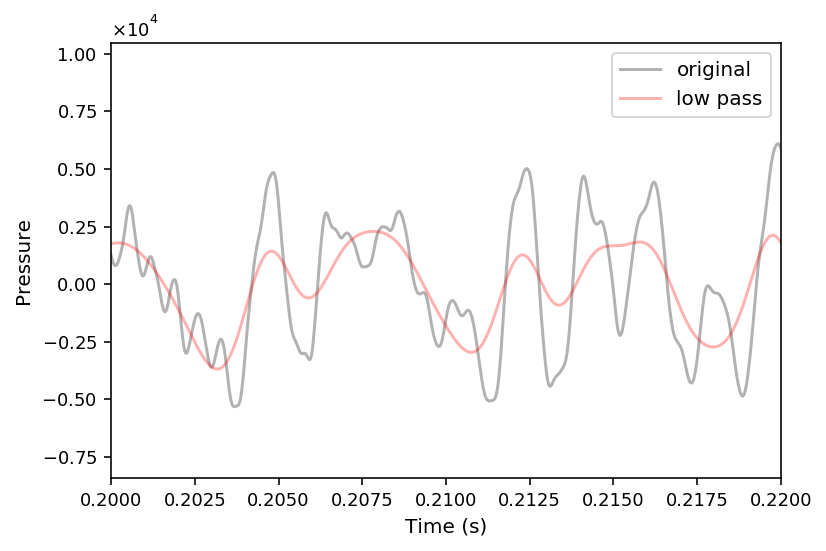

In [60]:
axes = plot_waveform(T, wav, 'k', label='original')
plot_waveform_on_top(axes, T, wav_lp, 'r', label='low pass')
axes.set_xlim([.2, .220])

In [61]:
# Saving the low passed audio
wavfile.write(AUDIO_FILE + "_lp.wav", s_rate, wav_lp*.001)

In [62]:
# Playing the low passed audio
Audio(AUDIO_FILE+ "_lp.wav")

In [63]:
# Playing the original audio
Audio(AUDIO_FILE)

# A high pass filter (only keeps the high frequencies)

In [64]:
# Cutoff frequency for the highpass filter.
F = 700

b, a = butter(4, 2.0*F/s_rate, btype='highpass')
wav_hp = filtfilt(b, a, wav, padlen=150)
wav_hp_ft = fft(wav_hp)

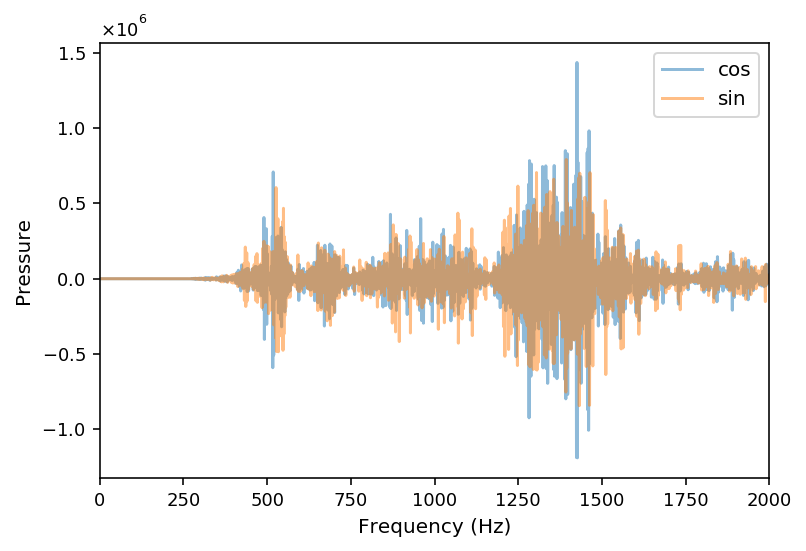

In [65]:
plot_F_comp(wav_hp_ft)

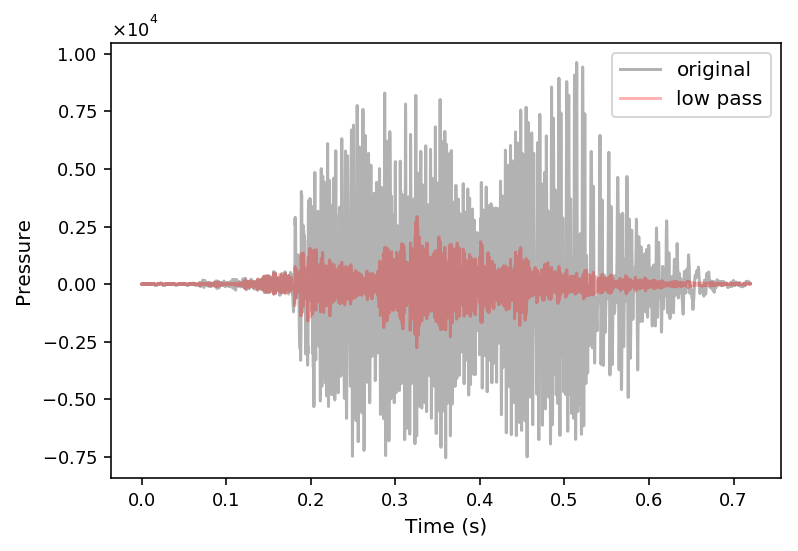

In [66]:
axes = plot_waveform(T, wav, 'k', label='original')
plot_waveform_on_top(axes, T, wav_hp, 'r', label='low pass')

(0.2, 0.22)

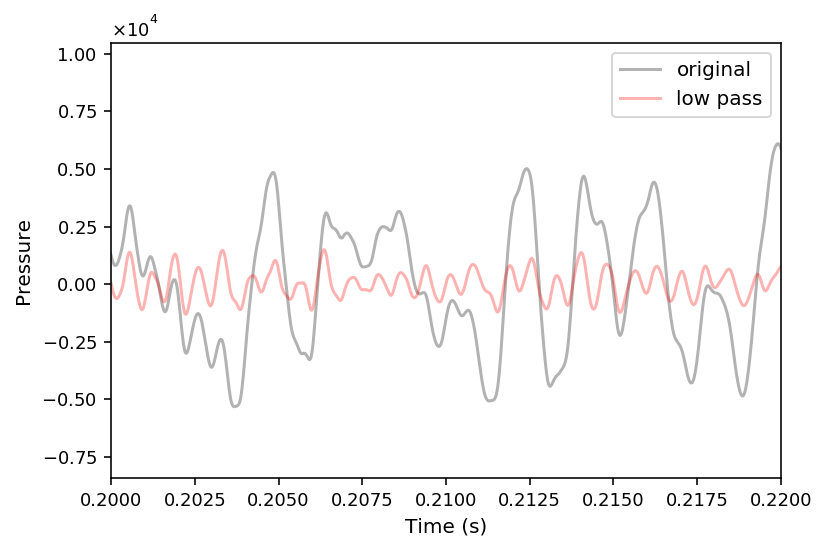

In [67]:
axes = plot_waveform(T, wav, 'k', label='original')
plot_waveform_on_top(axes, T, wav_hp, 'r', label='low pass')
axes.set_xlim([.2, .220])

In [68]:
# Saving the low passed audio
wavfile.write(AUDIO_FILE + "_hp.wav", s_rate, wav_hp*.001)

In [69]:
# Playing the high passed audio
Audio(AUDIO_FILE + "_hp.wav")

In [70]:
# Playing the original audio
Audio(AUDIO_FILE)